In [6]:
import pandas as pd
import plotnine as p

import anndata
import openTSNE
import scvi

%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [32]:
adata = anndata.read('SCP1052.lung.counts.h5ad')

In [33]:
adata.var['mean_'] = np.array(adata.X.mean(0))[0]
adata.var['frac_zero'] = 1 - np.array((adata.X > 0).sum(0))[0] / adata.shape[0]

In [34]:
adata.obs['n_UMI'].to_csv('library_sizes.csv')

In [35]:
scvi.data.poisson_gene_selection(adata, n_top_genes = 10000)

/home/ubuntu/software/anndata/anndata/compat/__init__.py:211: FutureWarning: During AnnData slicing, found matrix at .uns['W_harmony'] that happens to be dimensioned at n_obs×n_obs (106792×106792).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.


Sampling from binomial...: 100%|██████████| 10000/10000 [00:00<00:00, 14479.66it/s]


In [36]:
select_genes = [
    'SFTPC', 'DLG2', 'MS4A1', 'CD3E', 'CD8A', 'CD14', 'NCAM1', 'RYR1', 'ACTG1', 'CD163',
    'KRT7', 'STAT1', 'IFI16', 'SFTPD', 'SFTPB', 'CXCL2'
]

In [39]:
adata.var['required'] = adata.var.index.map(select_genes.__contains__).values

In [40]:
adata.var

,featureid,mean_,frac_zero,highly_variable,observed_fraction_zeros,expected_fraction_zeros,prob_zero_enriched_nbatches,prob_zero_enrichment,prob_zero_enrichment_rank,required
featurekey,,,,,,,,,,
A1BG,A1BG,0.022904,0.979708,False,0.979708,0.977666,0,0.0228,19638.0,False
A1BG-AS1,A1BG-AS1,0.018990,0.982133,False,0.982133,0.981404,0,0.0181,18826.0,False
A1CF,A1CF,0.000890,0.999157,False,0.999157,0.999111,0,0.0010,9750.0,False
A2M,A2M,2.066011,0.757079,True,0.757079,0.308973,1,0.5109,30957.0,False
A2M-AS1,A2M-AS1,0.006218,0.994073,False,0.994073,0.993825,0,0.0068,15614.0,False
...,...,...,...,...,...,...,...,...,...,...
ZXDC,ZXDC,0.248919,0.815136,True,0.815136,0.803589,1,0.1643,28311.0,False
ZYG11A,ZYG11A,0.003465,0.996938,False,0.996938,0.996549,0,0.0035,13600.0,False
ZYG11B,ZYG11B,0.171230,0.862977,True,0.862977,0.855629,1,0.1206,27073.0,False


In [41]:
adata.obs

,n_genes,n_UMI,percent_mito,method,doublet,predicted_celltype,compartment,Cluster,SubCluster,Viral+,leiden_res_2,leiden_res_1.3,donor,disease
barcodekey,,,,,,,,,,,,,,
02-P005175-S053-R01-GTTTGGAGTATCAAGA,2302,3874,1.445534,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
02-P005175-S053-R01-TGCAGTAAGCAGATAT,2286,3726,0.053677,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
02-P005175-S053-R01-CCCTAACCACTACCGG,1799,2904,0.068871,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
02-P005175-S053-R01-TCCGAAAAGGTATCTC,1276,1925,0.103896,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
02-P005175-S053-R01-TGCACGGTCTCGGCTT,1147,1742,0.229621,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04-P006354-S057-R02-AGGTCCGGTGATGATA,300,401,0.249377,cryo,False,NaN,nan,Endothelial,Capillary Aerocytes,False,4,8,D8_3,COVID-19
04-P006354-S057-R02-CTCTACGCAGATCTGT,312,412,0.000000,cryo,False,NaN,nan,Endothelial,Lymphatic EC,False,24,15,D8_3,COVID-19
04-P006354-S057-R02-TGACAACTCTCGATGA,298,400,4.250000,cryo,False,NaN,nan,T+NK,Doublets CD4 T/ CD8 T/ NK cells,False,1,5,D8_3,COVID-19


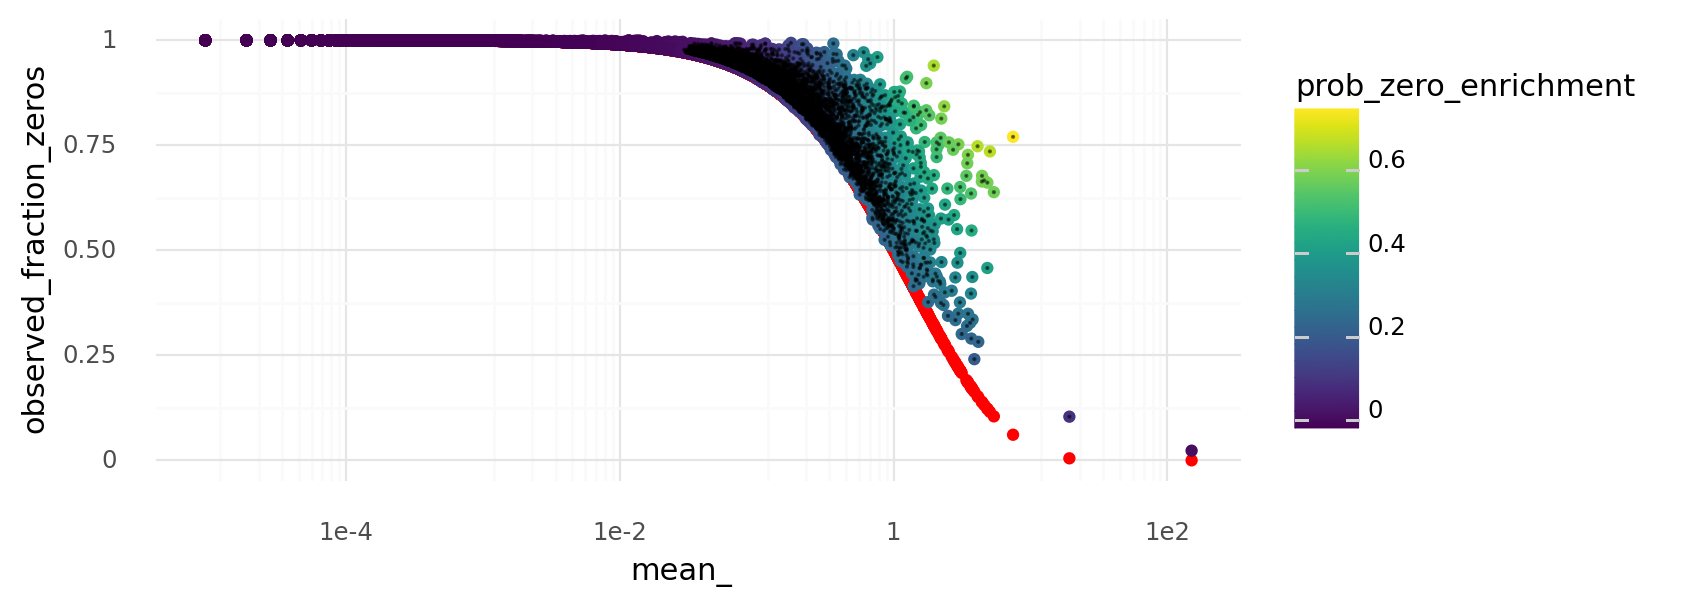

<ggplot: (8745481072613)>

In [42]:
p.options.figure_size = (7, 3)
(
    p.ggplot(p.aes(x='mean_', y='observed_fraction_zeros', color='prob_zero_enrichment'), adata.var)
    + p.geom_point(p.aes(y='expected_fraction_zeros'), color='r')
    + p.geom_point()
    + p.geom_point(data=adata.var.query('highly_variable'), shape='.', size=0.2, color='k', alpha=0.5)
    + p.scale_x_log10()
    + p.theme_minimal()
)

In [43]:
df_ = (
    adata.var
    .sort_values('prob_zero_enrichment_rank', ascending=False)
    .head(10)[['prob_zero_enrichment']]
)

df_

,prob_zero_enrichment
featurekey,
SFTPB,0.7272
FTL,0.6525
MACROD2,0.6471
NTM,0.6339
COL3A1,0.6055
MT-ND2,0.5904
FN1,0.5807
SFTPC,0.5802
MT-ND3,0.5776


In [44]:
(
    adata.obs
    .groupby(['method', 'donor'], observed = True)
    .size()
    .rename('count')
    .reset_index()
    .sort_values('donor')
)

,method,donor,count
0,nuclei,D1,8292
10,nuclei,D2,725
20,cryo,D3_1,387
21,cryo,D3_2,361
11,nuclei,D3_3,2770
12,nuclei,D4,3339
13,nuclei,D5,9555
14,nuclei,D6,4679
15,nuclei,D7,9880
16,nuclei,D8_1,1992


In [46]:
adata.var['selected'] = np.logical_or(adata.var['highly_variable'], adata.var['required'])
adata.var['selected'] = adata.var['selected'].astype(bool)

In [47]:
adata = adata[:, adata.var.query('selected').index].copy()

In [48]:
scvi.data.setup_anndata(adata, batch_key = 'donor')

INFO     Using batches from adata.obs["donor"]                                               
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              


/home/ubuntu/software/anndata/anndata/compat/__init__.py:211: FutureWarning: During AnnData slicing, found matrix at .uns['W_harmony'] that happens to be dimensioned at n_obs×n_obs (106792×106792).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
/home/ubuntu/software/anndata/anndata/compat/__init__.py:211: FutureWarning: During AnnData slicing, found matrix at .uns['W_harmony'] that happens to be dimensioned at n_obs×n_obs (106792×106792).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
/home/ubuntu/software/anndata/anndata/compat/__init__.py:211: FutureWarning: During AnnData slicing, found matrix at .uns['W_harmony'] that happens to be dimensioned at n_obs×n_obs (106792×106792).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
/home/ubuntu/software/anndata/anndata/compat/__init__.py:211:

INFO     Successfully registered anndata object containing 106792 cells, 10004 vars, 24      
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/home/ubuntu/software/anndata/anndata/compat/__init__.py:211: FutureWarning: During AnnData slicing, found matrix at .uns['W_harmony'] that happens to be dimensioned at n_obs×n_obs (106792×106792).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.


In [49]:
vae = scvi.model.SCVI(adata, gene_likelihood = 'nb')

In [50]:
1e6 / 106000

9.433962264150944

In [51]:
vae.train(max_epochs = 50)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Epoch 50/50: 100%|██████████| 50/50 [06:26<00:00,  7.73s/it, loss=3.68e+03, v_num=1]


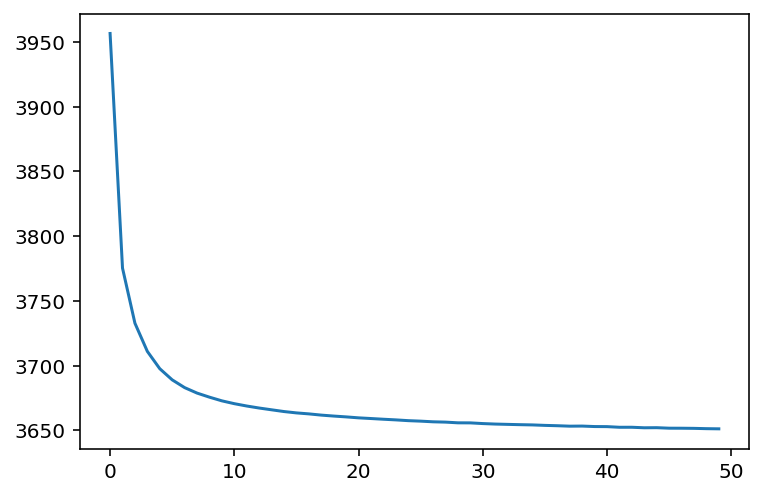

In [52]:
plt.plot(vae.history['reconstruction_loss_train']);

In [53]:
latent = vae.get_latent_representation()
adata.obsm['X_scvi'] = latent

In [54]:
tsne = openTSNE.TSNE(
    n_jobs=-1,
    verbose=True
)

YY = tsne.fit(adata.obsm['X_scvi'])

--------------------------------------------------------------------------------
TSNE(n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 10.78 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 6.49 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.17 seconds
===> Running optimization with exaggeration=12.00, lr=8899.33 for 250 iterations...
Iteration   50, KL divergence 6.8136, 50 iterations in 2.2980 sec
Iteration  100, KL divergence 6.2225, 50 iterations in 2.3216 sec
Iteration  150, KL divergence 6.0593, 50 iterations in 2.3171 sec
Iteration  200, KL divergence 5.9818, 50 iterations in 2.3154 sec
Iteration  250, KL divergence 5.9366, 50 iterations in 2.3264 sec
   --> Time elapsed: 11.58 seconds
===> Running optimization with exaggeration=1.00, lr=8899.33 for 500 iterations...

In [55]:
adata.obsm['X_tsne'] = YY

for i, z in enumerate(YY.T):
    adata.obs[f'tsne_{i}'] = z


In [56]:
adata

AnnData object with n_obs × n_vars = 106792 × 10004
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'tsne_0', 'tsne_1'
    var: 'featureid', 'mean_', 'frac_zero', 'highly_variable', 'observed_fraction_zeros', 'expected_fraction_zeros', 'prob_zero_enriched_nbatches', 'prob_zero_enrichment', 'prob_zero_enrichment_rank', 'required', 'selected'
    uns: 'Nuc-Cell_colors', 'SubCluster_colors', 'W_harmony', 'genome', 'harmony_knn_distances', 'harmony_knn_indices', 'manual_coarse_annotation_colors', 'method_colors', 'modality', 'neighbors', 'pca', 'predictions_colors', 'sample_colors', 'umap', 'hvg', '_scvi'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'sig_background', 'X_scvi', 'X_tsne'
    varm: 'PCs', 'de_res'
    layers: 'counts', 'winsorized'

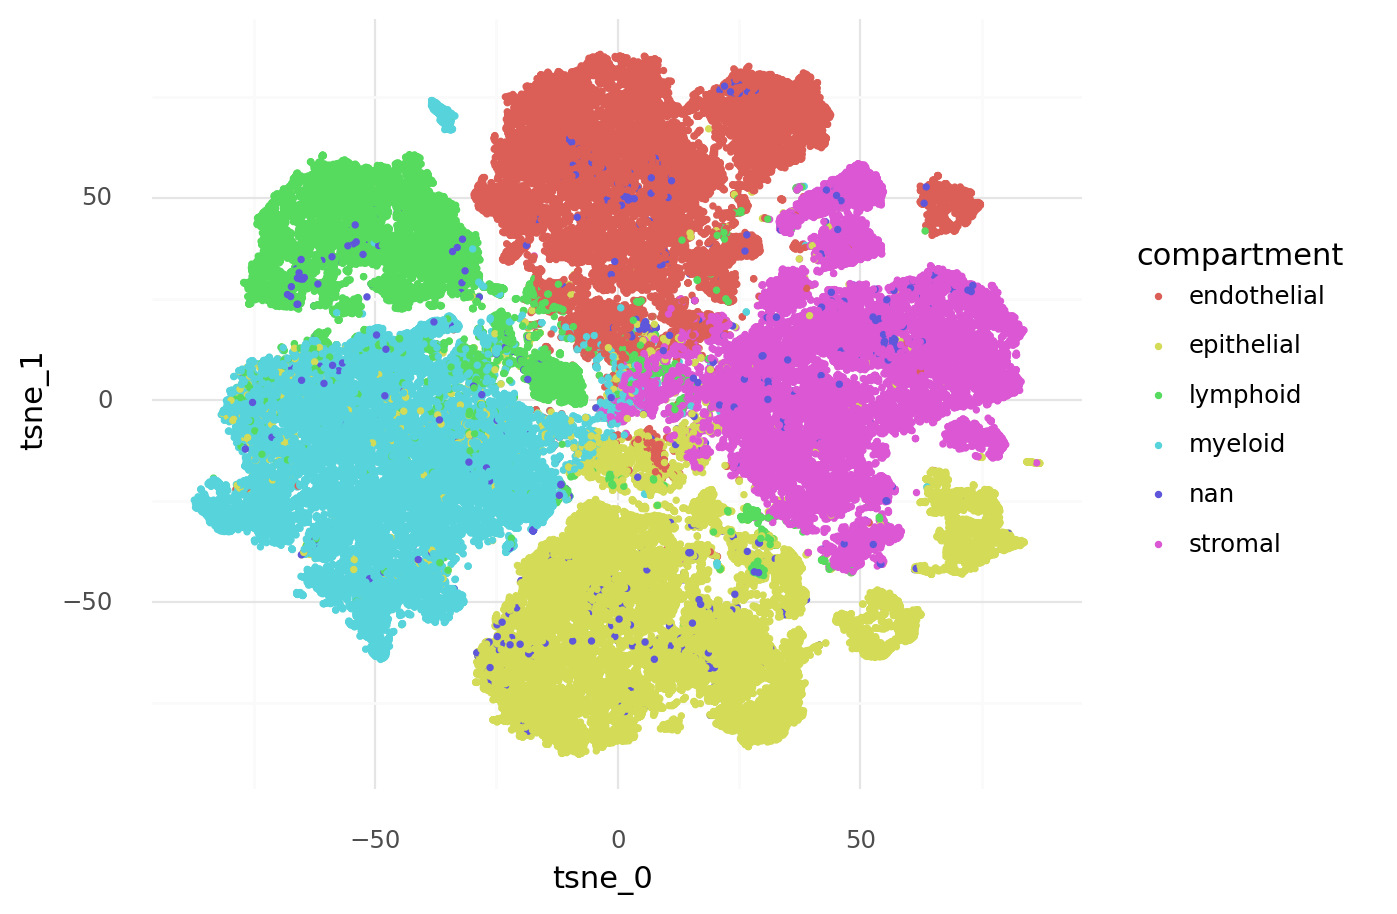

<ggplot: (8745742832478)>

In [57]:
p.options.figure_size = (6, 5)
(
    p.ggplot(p.aes(x='tsne_0', y='tsne_1', color='compartment'), adata.obs)
    + p.geom_point(shape='.')
    + p.theme_minimal()
)

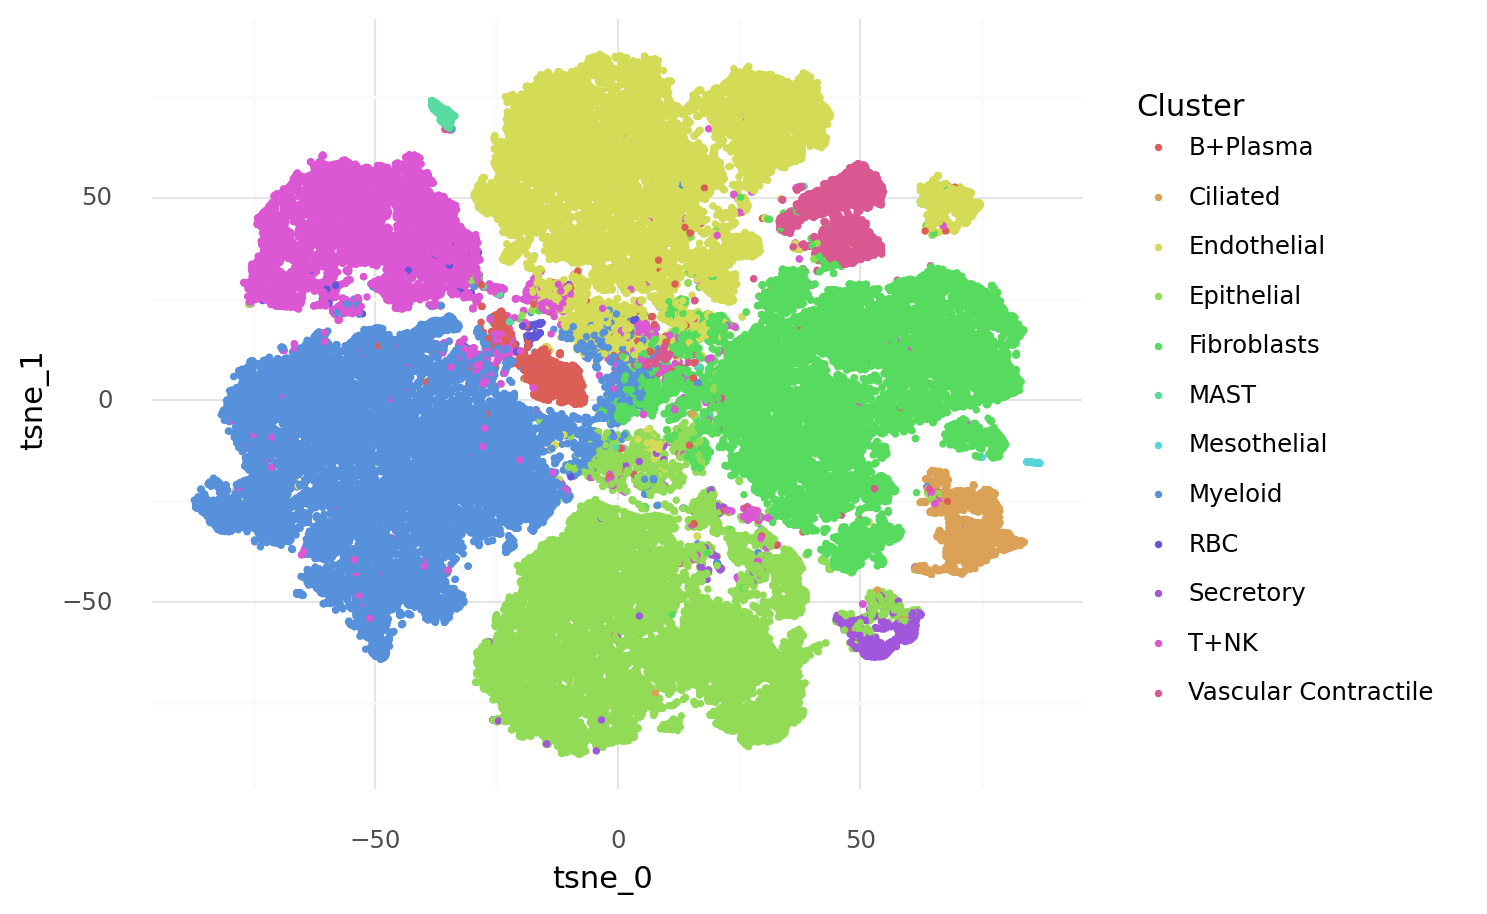

<ggplot: (8745703902609)>

In [58]:
p.options.figure_size = (6, 5)
(
    p.ggplot(p.aes(x='tsne_0', y='tsne_1', color='Cluster'), adata.obs)
    + p.geom_point(shape='.')
    + p.theme_minimal()
)

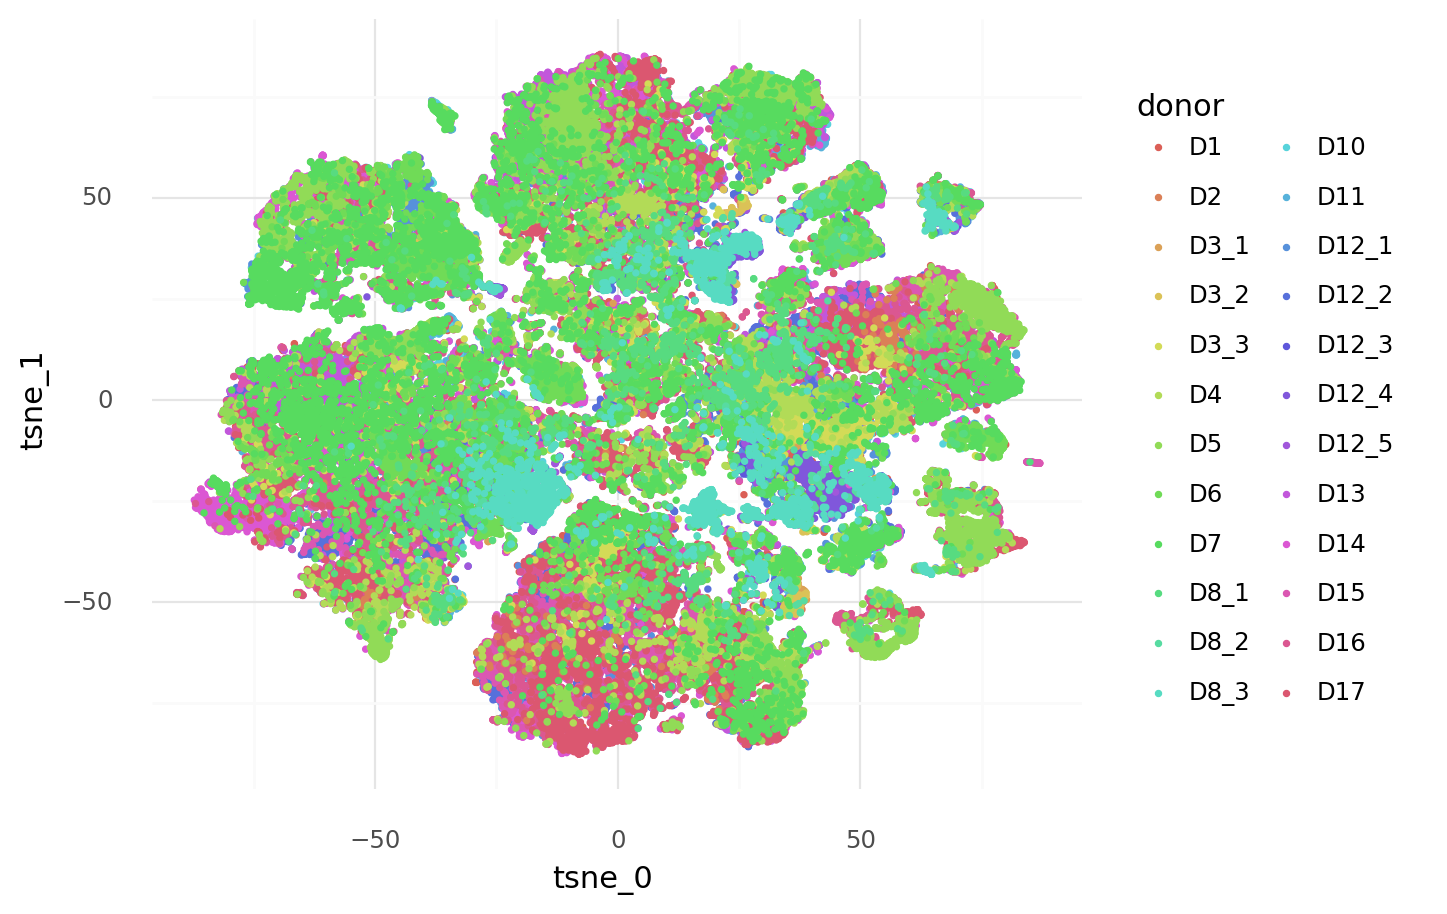

<ggplot: (8745703805130)>

In [59]:
p.options.figure_size = (6, 5)
(
    p.ggplot(p.aes(x='tsne_0', y='tsne_1', color='donor'), adata.obs)
    + p.geom_point(shape='.')
    + p.theme_minimal()
)

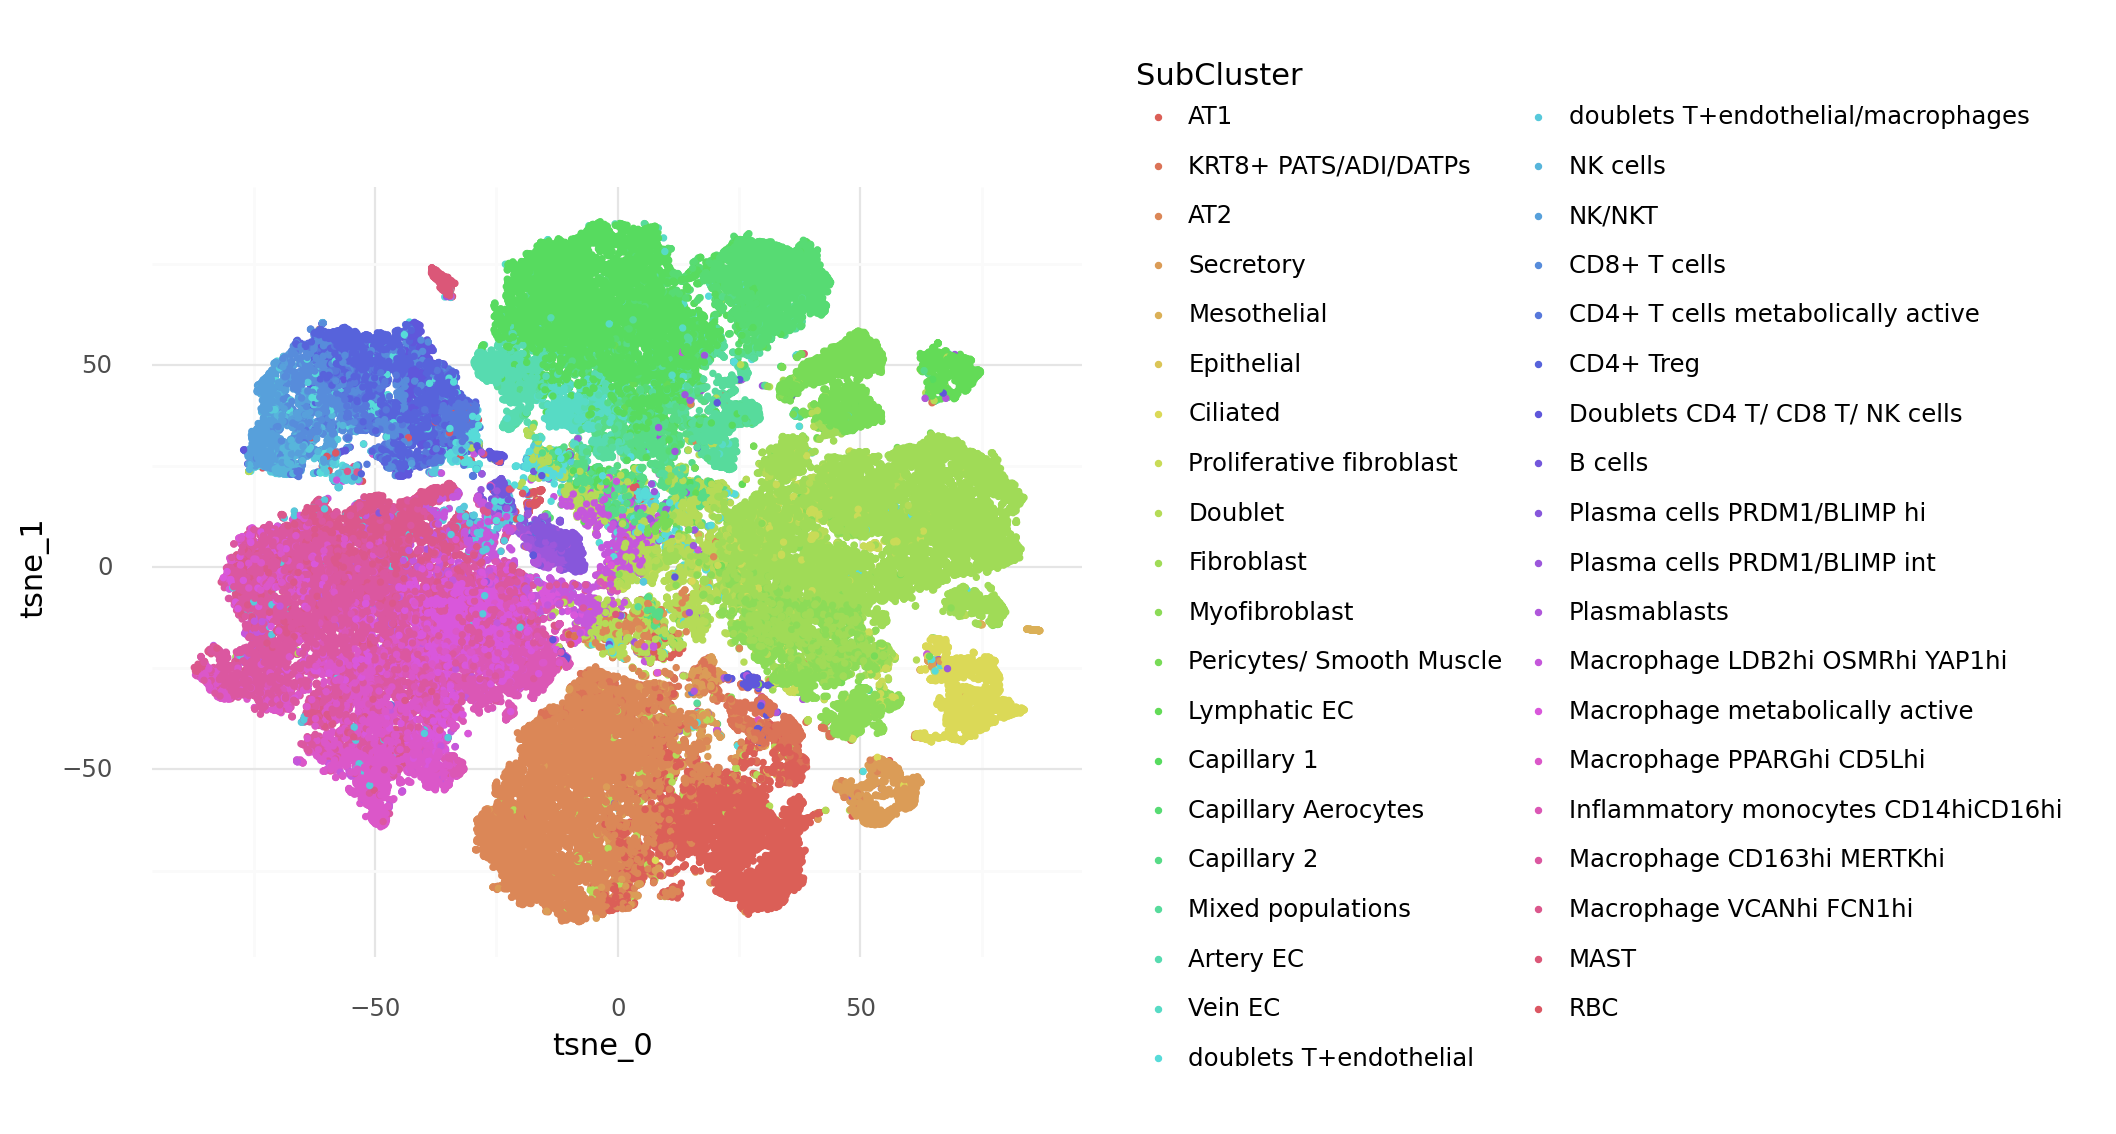

<ggplot: (8745703723593)>

In [60]:
p.options.figure_size = (6, 5)
(
    p.ggplot(p.aes(x='tsne_0', y='tsne_1', color='SubCluster'), adata.obs)
    + p.geom_point(shape='.')
    + p.theme_minimal()
)

In [61]:
ls

'210419 Fit scVI model.ipynb'
'210424 Simulate counts.ipynb'
'210524 GLM.ipynb'
'210524 Some example genes for linear regression.ipynb'
'210525 scVI.ipynb'
 SCP1052.lung.counts.2021-05-25T02:01:56.h5ad
 SCP1052.lung.counts.2021-05-25T02:01:56.model/
 SCP1052.lung.counts.h5ad
 SCP1052.lung.example.csv
 SCP1052.lung.example.long.csv
 library_sizes.csv


In [62]:
import datetime

In [63]:
timestamp = datetime.datetime.now().replace(microsecond=0).isoformat()

In [64]:
ad_name = f'SCP1052.lung.counts.{timestamp}.h5ad'

model_name = ad_name.replace('.h5ad', '.model/')
vae.save(model_name)

adata.uns['scvi_model'] = model_name

adata.write(ad_name)